### Yahoo Japan

In [16]:
from bs4 import BeautifulSoup
import requests
search = '韓流'
verbose = ''

for i in range(50) :
    url = "https://chiebukuro.yahoo.co.jp/search/?p="+search+"&ei=UTF-8&aq=1&oq=kannkoku&x=nl&b="+str(i)+'1'
    response = requests.get(url)
    response.encoding = response.apparent_encoding

    bs = BeautifulSoup(response.text, 'html.parser')
    bs_ul = bs.find('div')


    for bs_li in bs_ul.find_all('div'):
        bs_text = bs_li.text
        if bs_text != '' and bs_text != '\n' :
            print(bs_text)
            verbose += bs_text

キーワードを消すカテゴリQ&A一覧公式・専門家質問・相談JavaScriptが無効です。ブラウザの設定でJavaScriptを有効にしてください。JavaScriptを有効にするには「韓流」の検索結果関連検索ワード韓流ドラマ質問一覧韓流ドラマホジュンで主人公のホジュンは王の治療をして両班になりますが 生まれたときは父親が両班...両班で母親は賤民？奴婢？でしたが生まれたときは両班ではないんですか？母親のせいで賤民か奴婢なんですか？ また同じ監督の韓流ドラマ...解決済み質問日時：2022/6/17 19:53回答数：1閲覧数：397エンターテインメントと趣味>テレビ、ラジオ>アジア・韓国ドラマ韓流時代劇ドラマを見ると、王が家臣に文書や罪状を読み上げる時に「世はさる庚申の年〇月」、「世はさる「世はさる辛亥の年〇月」と言って読み上げていますが、 日本の江戸時代やそれ以前の天皇もそのような読み方をしていたのですか？解決済み質問日時：2023/3/26 15:32回答数：5閲覧数：96教養と学問、サイエンス>歴史>日本史韓流ドラマ タイトルわかる方教えてください 写真の韓流ドラマのタイトルわかる方教えてください...韓流ドラマ タイトルわかる方教えてください 写真の韓流ドラマのタイトルわかる方教えてくださいm(*_ _)m解決済み質問日時：2021/9/3 8:33回答数：1閲覧数：73エンターテインメントと趣味>テレビ、ラジオ>アジア・韓国ドラマ韓流って本当に日本で流行したのですか？ ＢＴＳの海外の人気も嘘っぽく感じるのですが。 私の周り...周りで韓流好きな人はいませんし音楽も魅力を感じません、顔も似たり寄ったりで見分けがつきません。 皆さんは、どう思いますか？解決済み質問日時：2021/8/9 10:35回答数：7閲覧数：1,673エンターテインメントと趣味>音楽>K-POP、アジア韓流好きのみなさん、韓流ブームと言われてた裏側を暴く記事がありました。これどう思いますか？ ↓ K-↓ K-POPが "本当に" 日本や世界で人気があるのか気になったので調べてみた https://...解決済み質問日時：2021/6/9 12:33回答数：9閲覧数：101エンターテインメントと趣味>音楽>K-POP、アジア韓流ドラマファンにお聞きします。 韓流ドラマを見るなら、Netfl

In [17]:
import re
string_without_newline = re.sub(r"\n[\s0-9'月火水木金土日']", " ", verbose)
string_without_special_chars = re.sub('[\\s]+', '', string_without_newline)

In [18]:
# python解析器janomeをインポート - 1
from janome.tokenizer import Tokenizer

# 形態素解析用オブジェクトの生成 - 2
text = Tokenizer()

In [19]:
txt = string_without_special_chars

# txtから読み込んだデータを形態素解析 - 4
#lines = txt.split("\r\n")
#for i in lines:
    #print(i)
    #print("\n")
    #text_c = text.tokenize(i)
    #for j in text_c:
        #print(j)

#print("\n")

In [20]:
# テキストを一行ごとに処理 - 5
word_dic = {}
lines_1 = txt.split("\r\n")
#print(lines_1)
#print("\n")
for line in lines_1:
    malist = text.tokenize(line)
    for w in malist:
        word = w.surface
        ps = w.part_of_speech # 品詞 - 6
        if ps.find("名詞") < 0: continue # 名詞だけをカウント - 7
        if not word in word_dic:
            word_dic[word] = 0
        word_dic[word] += 1

In [21]:
# よく使われる単語を表示 - 8
keys = sorted(word_dic.items(), key = lambda x:x[1] , reverse=True)
for i in range(1000) :
    if keys[i][0].isalpha() == False :
        keys.pop(i)
    if keys[i][0] in '！＠＃＄％＾＆＊（）：:「」『』’”/(/) /)':
        keys.pop(i)
    if keys[i][0].isnumeric() == True :
        keys.pop(i)
for word, cnt in keys[:100]:
    print("{0}({1}) ".format(word,cnt), end="")

数(7702) 韓(7216) 流(7030) >(5412) 質問(5060) ドラマ(4620) 日時(4600) 順(4400) 回答(4166) 閲覧(3800) 韓国(3042) 解決(2880) 済み(2880) 趣味(2310) エンターテインメント(2304) 検索(1956) アジア(1794) の(1782) テレビ(1776) ラジオ(1614) 件(1542) ,(1332) 人(1050) 関連(1006) 好き(972) 政治(924) 日本(918) 方(888) 更新(800) お礼(800) 中(780) JavaScript(750) ブーム(738) ん(708) ワード(600) ファン(564) 一覧(550) アイドル(534) 国際(516) 情勢(504) キーワード(500) 有効(500) K(498) 問題(498) POP(492) 度(490) 前(480) ニュース(474) 結果(468) 8(462) こと(456) ご(430) 利用(418) 相談(408) 私(408) 広告(400) 社会(396) 次(392) 音楽(390) お(386) 何(378) スター(360) 芸能人(354) 女性(354) よう(342) 61(324) 映画(318) すべて(312) 日本人(312) 目(310) 対象(306) 受付(306) 答え(300) 表示(300) 順序(300) 条件(300) 今(288) 恋愛(288) 家(286) 人気(276) 公式(268) カテゴリ(256) A(256) 関係(252) Q(250) 専門(250) 無効(250) ブラウザ(250) 設定(250) メディア(242) 年(240) 話(234) 時代(222) 意見(218) 的(216) 2023(204) さん(204) 嫌い(204) 最近(204) プライバシー(200) 

In [22]:
keys = dict(keys[5:])

(-0.5, 1495.5, 1959.5, -0.5)

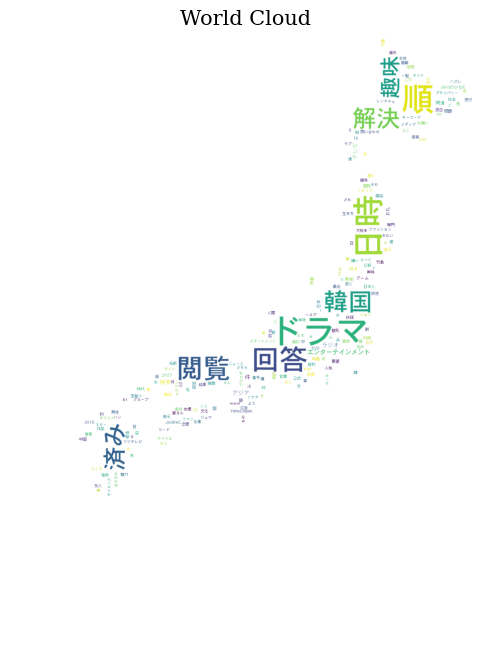

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

im = Image.open('japan.png')
mask_arr = np.array(im)
font_path = "/Library/Fonts/Osaka.ttf"
wc = WordCloud(font_path = font_path, width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(keys)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 15, fontfamily = 'Serif')
plt.axis('off')

### Twitter

In [32]:
twitter_consumer_key = ''
twitter_consumer_secret = ''
twitter_access_token = ''
twitter_access_secret = ''

import twitter

twitter_api = twitter.Api(consumer_key = twitter_consumer_key,
                          consumer_secret = twitter_consumer_secret,
                          access_token_key = twitter_access_token,
                          access_token_secret = twitter_access_secret)

AttributeError: module 'twitter' has no attribute 'Api'